# 고객 세분화 실습

## 1. 환경 설정

### 1.1 분서에 필요한 library 호출 및 google drive 연결


In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [110]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. 데이터 불러오기

### 2.1 데이터 불러오기 및 확인

In [111]:
df_org = pd.read_csv('/content/drive/MyDrive/data.csv',encoding='latin')
df_org.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [112]:
df_org.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [113]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [114]:
# 수치형 컬럼만 추출
numeric_cols = df_org.select_dtypes(include=['int64', 'float64']).columns

In [115]:
# 기본 요약 통계량
df_org[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [116]:
# 왜도 (Skewness), 첨도 (Kurtosis), 분산, 고유값 수, 0 이하 값 개수
additional_stats = pd.DataFrame({
    'skewness': df_org[numeric_cols].skew(),
    'kurtosis': df_org[numeric_cols].kurt(),
    'variance': df_org[numeric_cols].var(),
    'n_unique': df_org[numeric_cols].nunique(),
    'n_zeros': (df_org[numeric_cols] == 0).sum(),
    'n_negative': (df_org[numeric_cols] < 0).sum()
})

additional_stats

,skewness,kurtosis,variance,n_unique,n_zeros,n_negative
Quantity,-0.264076,119769.160031,4.755939e+04,722,0,10624
UnitPrice,186.506972,59005.719097,9.362469e+03,1630,2515,2
CustomerID,0.029835,-1.179982,2.936426e+06,4372,0,0


In [117]:
# 예: 로그 변환 전후 비교할 컬럼 (양수만 해당)
log_test_col = 'UnitPrice'
df_org['log_' + log_test_col] = np.log1p(df_org[log_test_col])  # log(1 + x)

# 시각적으로 확인
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_org[log_test_col], kde=True)
plt.title(f'Original {log_test_col}')

plt.subplot(1, 2, 2)
sns.histplot(df_org["log_" + log_test_col], kde=True)
plt.title(f'Log-transformed {log_test_col}')
plt.show()

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x78b326483ec0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x78b326481800> (for post_execute):


KeyboardInterrupt: 

In [118]:
stats_summary = df_org[numeric_cols].describe().T
stats_summary['skewness'] = df_org[numeric_cols].skew()
stats_summary['kurtosis'] = df_org[numeric_cols].kurt()
stats_summary['n_unique'] = df_org[numeric_cols].nunique()
stats_summary['n_zeros'] = (df_org[numeric_cols] == 0).sum()
stats_summary['n_negative'] = (df_org[numeric_cols] < 0).sum()
stats_summary

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis,n_unique,n_zeros,n_negative
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0,-0.264076,119769.160031,722,0,10624
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0,186.506972,59005.719097,1630,2515,2
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0,0.029835,-1.179982,4372,0,0


In [119]:
# 수치형 제외 → object(문자), category 타입 중심
cat_cols = df_org.select_dtypes(include=['object', 'category']).columns
cat_cols


Index(['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country'], dtype='object')

In [120]:
def categorical_summary(df, col, top_n=10):
    """한 범주형 컬럼의 빈도·비율·누적비율·상·하위 N 등을 요약"""

    vc = df[col].value_counts(dropna=False)
    total = vc.sum()
    summary = (
        vc.to_frame(name='Count')
          .assign(Percentage=lambda x: (x['Count'] / total * 100).round(2),
                  CumPct=lambda x: (x['Count'].cumsum() / total * 100).round(2))
    )

    # 상·하위 N 추출
    top = summary.head(top_n)
    bottom = summary.tail(top_n)

    return summary, top, bottom

In [122]:
from IPython.display import display

country_summary, country_top, country_bottom = categorical_summary(df_org, 'Country', top_n=5)

print("🔹 전체 Country 분포 요약")
display(country_summary.head())        # 상위 일부만 확인

print("\n🔹 Top 5 Countries")
display(country_top)

print("\n🔹 Bottom 5 Countries")
display(country_bottom)

🔹 전체 Country 분포 요약


,Count,Percentage,CumPct
Country,,,
United Kingdom,495478,91.43,91.43
Germany,9495,1.75,93.18
France,8557,1.58,94.76
EIRE,8196,1.51,96.28
Spain,2533,0.47,96.74



🔹 Top 5 Countries


,Count,Percentage,CumPct
Country,,,
United Kingdom,495478,91.43,91.43
Germany,9495,1.75,93.18
France,8557,1.58,94.76
EIRE,8196,1.51,96.28
Spain,2533,0.47,96.74



🔹 Bottom 5 Countries


,Count,Percentage,CumPct
Country,,,
Lithuania,35,0.01,99.98
Brazil,32,0.01,99.99
Czech Republic,30,0.01,99.99
Bahrain,19,0.00,100.00
Saudi Arabia,10,0.00,100.00


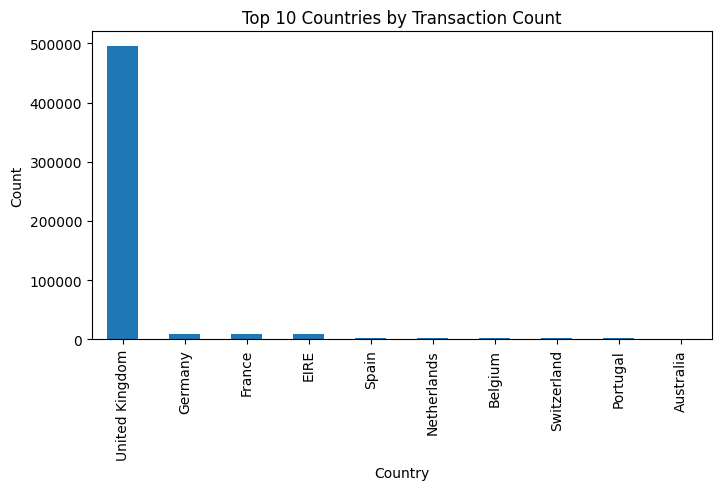

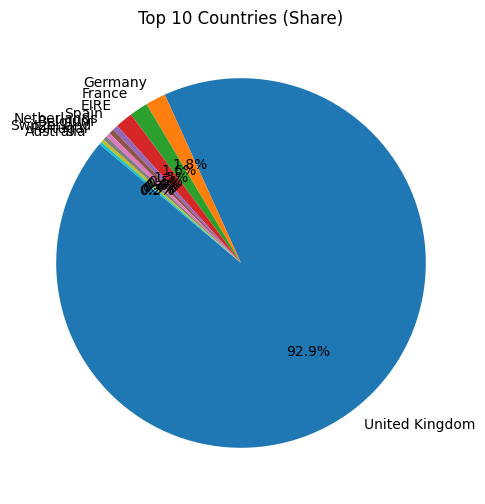

In [123]:
# 상위 10개 bar chart
country_top10 = country_summary.head(10)
country_top10['Count'].plot(kind='bar', figsize=(8,4), title='Top 10 Countries by Transaction Count')
plt.ylabel('Count'); plt.xlabel('Country'); plt.show()

# 전체 pie (국가 수가 많으면 top N만 추천)
plt.figure(figsize=(6,6))
country_top10['Count'].plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Countries (Share)'); plt.ylabel(''); plt.show()

반품(취소) 비율: 1.71%


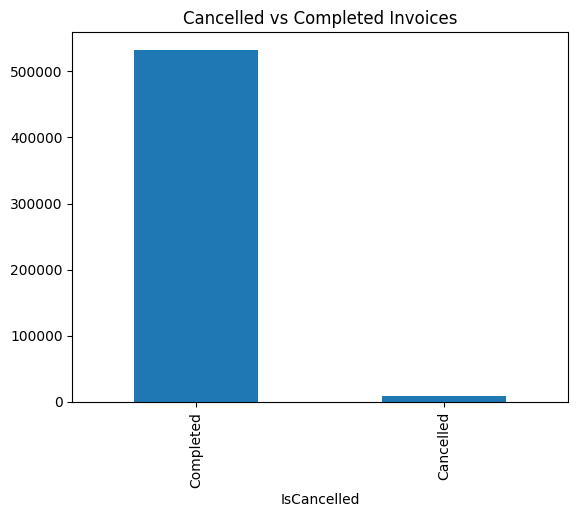

In [124]:
#InvoiceNo- 반품 여부 파악
df_org['IsCancelled'] = df_org['InvoiceNo'].str.startswith('C')
cancel_rate = df_org['IsCancelled'].mean() * 100
print(f"반품(취소) 비율: {cancel_rate:.2f}%")

cancel_summary = df_org['IsCancelled'].value_counts().rename({True: 'Cancelled', False: 'Completed'})
cancel_summary.plot(kind='bar', title='Cancelled vs Completed Invoices')
plt.show()

In [ ]:
# TotalPrice 먼저 계산
df_org['TotalPrice'] = df_org['Quantity'] * df_org['UnitPrice']

country_sales = (
    df_org.groupby('Country')['TotalPrice'].sum()
      .sort_values(ascending=False)
      .to_frame(name='Sales')
)

# 누적 매출 비율로 파레토(상위20%가 매출 80%?) 확인
country_sales['CumPct'] = (country_sales['Sales'].cumsum() /
                           country_sales['Sales'].sum() * 100)

print(country_sales.head(10))          # 상위 10개 매출


In [ ]:
df_org['InvoiceDate'] = pd.to_datetime(df_org['InvoiceDate'])
df_org['YearMonth'] = df_org['InvoiceDate'].dt.to_period('M')

country_monthly = (
    df_org.groupby(['YearMonth', 'Country'])['InvoiceNo']
      .nunique()
      .unstack(fill_value=0)
)

# 영국(United Kingdom) 월별 거래 추이
country_monthly['United Kingdom'].plot(figsize=(10,4),
                                       title='Monthly Transactions – United Kingdom')
plt.ylabel('Number of Invoices'); plt.show()

In [ ]:
# 거래량 기준 상위 10개 국가 선정
top_countries = df_org['Country'].value_counts().head(10).index

# 월별 국가별 거래 수량 피벗 테이블 생성
country_monthly = (
    df_org[df_org['Country'].isin(top_countries)]
    .groupby(['YearMonth', 'Country'])['InvoiceNo']
    .nunique()
    .unstack(fill_value=0)
)

# 시각화
plt.figure(figsize=(12, 6))
for country in country_monthly.columns:
    plt.plot(country_monthly.index.to_timestamp(), country_monthly[country], label=country)

plt.title('Monthly Transactions by Country (Top 10)')
plt.xlabel('Month')
plt.ylabel('Number of Invoices')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# figure와 2개의 서브플롯 (공유 x축)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6), gridspec_kw={'height_ratios': [1, 3]})

# 상단: 큰 값만 보여줌 (ex. United Kingdom 중심)
for country in country_monthly.columns:
    ax1.plot(country_monthly.index.to_timestamp(), country_monthly[country], label=country)

# 하단: 작은 값 위주로 확대
for country in country_monthly.columns:
    ax2.plot(country_monthly.index.to_timestamp(), country_monthly[country], label=country)

# y축 범위 설정 (위는 1000 이상만, 아래는 0~200)
ax1.set_ylim(1000, country_monthly.max().max() + 200)
ax2.set_ylim(0, 200)

# y축 물결 표시 (break 효과)
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.tick_params(labeltop=False)  # x축 상단 라벨 제거
ax2.xaxis.tick_bottom()

# 물결선 효과 그리기
d = .015  # break 크기
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # 왼쪽 대각선
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # 오른쪽 대각선

kwargs.update(transform=ax2.transAxes)  # 하단 축으로 전환
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # 왼쪽 대각선
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # 오른쪽 대각선

# 기타 설정
ax2.set_xlabel("Month")
ax1.set_ylabel("Invoices (High)")
ax2.set_ylabel("Invoices (Low)")
fig.suptitle("Monthly Transactions by Country (Broken Y-axis)")

plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.3))
plt.tight_layout()
plt.show()

In [ ]:
# 1. 전처리: 날짜 및 총 판매량 계산
df_org['InvoiceDate'] = pd.to_datetime(df_org['InvoiceDate'])
df_org['YearMonth'] = df_org['InvoiceDate'].dt.to_period('M')
df_org['TotalPrice'] = df_org['Quantity'] * df_org['UnitPrice']

# 2. 월별 국가별 총 판매량 계산
monthly_sales_by_country = (
    df_org.groupby(['YearMonth', 'Country'])['TotalPrice']
      .sum()
      .unstack(fill_value=0)
)

# 3. 거래량 상위 10개 국가만 추출
top10_countries_sales = df_org['Country'].value_counts().nlargest(10).index
monthly_sales_top10 = monthly_sales_by_country[top10_countries_sales]

# 4. broken y-axis 시각화
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6), gridspec_kw={'height_ratios': [1, 3]})

# 상단: 큰 값
for country in monthly_sales_top10.columns:
    ax1.plot(monthly_sales_top10.index.to_timestamp(), monthly_sales_top10[country], label=country)

# 하단: 작은 값
for country in monthly_sales_top10.columns:
    ax2.plot(monthly_sales_top10.index.to_timestamp(), monthly_sales_top10[country], label=country)

# y축 범위 설정
ax1.set_ylim(10000, monthly_sales_top10.max().max() + 5000)  # 상단 범위
ax2.set_ylim(0, 3000)  # 하단 확대 범위

# y축 물결
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()

d = .015  # break 표시
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# 라벨 및 제목
ax2.set_xlabel("Month")
ax1.set_ylabel("Total Sales (High)")
ax2.set_ylabel("Total Sales (Low)")
fig.suptitle("Monthly Total Sales by Country (Top 10, Broken Y-axis)")

plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.3))
plt.tight_layout()
plt.show()

In [ ]:
df_clean = df_org[df_org['Quantity'] > 0].copy()
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

# 다시 월별 총매출 계산 (반품 제거된 데이터 기준)
df_clean['YearMonth'] = df_clean['InvoiceDate'].dt.to_period('M')
monthly_sales_by_country = (
    df_clean.groupby(['YearMonth', 'Country'])['TotalPrice']
            .sum()
            .unstack(fill_value=0)
)

# 거래 상위 10개 국가 선택
top10_countries = df_clean['Country'].value_counts().nlargest(10).index
monthly_sales_top10 = monthly_sales_by_country[top10_countries]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6), gridspec_kw={'height_ratios': [1, 3]})

# 상단 범위 (UK 등 고매출)
for country in monthly_sales_top10.columns:
    ax1.plot(monthly_sales_top10.index.to_timestamp(), monthly_sales_top10[country], label=country)

# 하단 범위 (나머지 국가 확대)
for country in monthly_sales_top10.columns:
    ax2.plot(monthly_sales_top10.index.to_timestamp(), monthly_sales_top10[country], label=country)

# y축 범위 조정
ax1.set_ylim(500000, monthly_sales_top10.max().max() + 50000)
ax2.set_ylim(0, 30000)

# y축 단절 표현
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()

d = .015
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# 라벨
ax2.set_xlabel("Month")
ax1.set_ylabel("Total Sales (High)")
ax2.set_ylabel("Total Sales (Low)")
fig.suptitle("Monthly Total Sales by Country (Top 10, Broken Y-axis)")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.3))
plt.tight_layout()
plt.show()

In [ ]:
# IQR 계산
Q1 = df_org['Quantity'].quantile(0.25)
Q3 = df_org['Quantity'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계선
lower_bound = Q1 - 7 * IQR
upper_bound = Q3 + 7 * IQR

# 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_org['Quantity'])

# 경계선 표시
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='blue', linestyle='--', label='Upper Bound')


plt.xlim(lower_bound - 1000, upper_bound + 1000)

# 라벨링
plt.title('Boxplot of Quantity with IQR Bounds')
plt.xlabel('Quantity')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Quantity 데이터 준비
quantity = df_org['Quantity']

# IQR 기준 경계 구하기
Q1 = quantity.quantile(0.25)
Q3 = quantity.quantile(0.75)
IQR = Q3 - Q1

# 이상치 범위 설정 (ex: 1.5 IQR 범위 내만 시각화)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 제거한 데이터만 시각화
filtered_quantity = quantity[(quantity >= -1000) & (quantity <= 1000)]

# 시각화
plt.figure(figsize=(12, 6))
sns.displot(filtered_quantity, bins=100, kde=True, color='lightgray')
plt.axvline(Q1, color='red', linestyle='--', linewidth=2, label=f'Q1 ({Q1:.2f})')
plt.axvline(Q3, color='blue', linestyle='--', linewidth=2, label=f'Q3 ({Q3:.2f})')
plt.xlim(-200, 200)

# 라벨링
plt.title('Filtered Quantity Distribution with Q1 and Q3')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#범주 별 구매 다양성
customer_variety = (
    df_org.groupby('CustomerID')['StockCode']
      .nunique()
      .to_frame(name='DistinctItems')
)

print(customer_variety['DistinctItems'].describe())

In [ ]:
# 이상치 처리 기준별 비교표
methods_comparison = pd.DataFrame({
    '기준': ['Q1 - 1.5×IQR, Q3 + 1.5×IQR', 'z-score > 3 또는 < -3', '상위/하위 n%'],
    '방법': ['IQR 방식', 'Z-score 방식', 'Percentile 방식'],
    '장점': ['비모수적, 분포 가정 없음', '정규분포 가정하에 효과적', '유연하게 비율 설정 가능'],
    '단점': ['극단값 많을 경우 민감', '정규분포 아닐 경우 부적절', '기준 선택 주관적']
})

methods_comparison

### 2.2 데이터 형변

In [ ]:
# 문자열 변수를 datetime 으로 변환
# df_org['InvoiceDate'] = pd.DatetimeIndex(df_org['InvoiceDate'])
# df_org.info()

## 3.NULL 값 처리
### 3.1 NULL 값 확인

In [ ]:
# Null 값이 있는 전체 case 수 확인
df_org.isnull().sum().sum()

In [ ]:
# Null 값의 비율
df_org.isnull().sum().sum() / df_org.shape[0]

In [ ]:
# Null 값이 있는 변수 확인
df_org.isnull().sum()

### Question
- CustomerID 가 Null인 경우가 정상일까?
- 만약 Null 인 경우가 정상이라면 분석에 사용할 수 있을까?

In [ ]:
# CustomerID 가 Null 인 case  확인하기
df_org[df_org.CustomerID.isnull()]

### 3.2 NULL 값 처리 (삭제) 및 확인

In [ ]:
df_na_treat =  df_org.dropna(axis = 0)

In [ ]:
# Country 비율 요약 (df_na_treat 기준)
country_counts = df_na_treat['Country'].value_counts(normalize=True) * 100
top_countries = country_counts[country_counts >= 2]
others = country_counts[country_counts < 2].sum()

# 기타 포함 시리즈로 재구성
country_summary = top_countries.copy()
country_summary['Others'] = others

# 파이 차트
plt.figure(figsize=(8, 8))
plt.pie(country_summary, labels=country_summary.index, autopct='%1.1f%%', startangle=140)
plt.title('Country Distribution', fontsize = 18)
plt.axis('equal')
plt.show()

In [ ]:
# 상위 5개 + 기타 처리
country_counts = df_na_treat['Country'].value_counts()
total = country_counts.sum()

# 비율과 누적 비율 계산
country_df = pd.DataFrame({
    'Country': country_counts.index,
    'Count': country_counts.values,
})
country_df['Percentage'] = (country_df['Count'] / total) * 100
country_df['CumPct'] = country_df['Percentage'].cumsum()

# 상위 5개 + 기타
top_5 = country_df.iloc[:5].copy()
others = country_df.iloc[5:].copy()

# '기타' 묶기
others_sum = pd.Series({
    'Country': 'Others',
    'Count': others['Count'].sum(),
    'Percentage': others['Percentage'].sum()
})
top_5 = pd.concat([top_5, others_sum.to_frame().T], ignore_index=True)
top_5['CumPct'] = top_5['Percentage'].cumsum()

# 그래프
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Count', data=top_5, palette='pastel')

# 값 표시
for index, row in top_5.iterrows():
    plt.text(index, row['Count'] + total * 0.005, f"{row['Percentage']:.1f}%", ha='center', fontsize=10)

plt.title('Top 5 Countries + Others by Transaction Count', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Transaction Count')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
country_counts = df_na_treat['Country'].value_counts()
total = country_counts.sum()

# 비율 및 누적 비율 계산
country_summary = pd.DataFrame({
    'Country': country_counts.index,
    'Count': country_counts.values
})
country_summary['Percentage'] = (country_summary['Count'] / total * 100).round(2)
country_summary['CumPct'] = country_summary['Percentage'].cumsum().round(2)

# 상위 5개 국가만 출력
top5_country_summary = country_summary.head(5).reset_index(drop=True)
import IPython.display as display
display.display(top5_country_summary)

In [ ]:
df_na_treat.isnull().sum().sum()

In [ ]:
df_na_treat.shape

## 4. 데이터탐색 및 이상치 제거

### 4.1 이상치 확인

In [ ]:
df_na_treat.describe()

In [ ]:
# 이상치 케이스 확인
df_na_treat[(df_na_treat.Quantity == -80995) | (df_na_treat.Quantity == 80995) ]

In [ ]:
# Quantity 이상치 case 확인
df_na_treat[df_na_treat.Quantity <= 0 ].count()

In [ ]:
# 음수값으로 시작하는 case는 InvocieNo 가 'C' 로 시작 하는 경우와 case 가 동일함
df_na_treat['InvoiceNo'].str.startswith("C").value_counts()

In [ ]:
df_na_treat[(df_na_treat.Quantity <= 0) & (df_na_treat.InvoiceNo.str.startswith("C"))].shape

In [ ]:
# UnitPirce 가 가장 큰 값도 환불 case 임
df_na_treat[df_na_treat.UnitPrice == 38970]

In [ ]:
df_na_treat[df_na_treat.UnitPrice == 0].head(10)

### 4.2 EDA


In [ ]:
# 연속형 변수의 대략적인 분포 확인

df_na_treat.describe()

# 확인 필요한 부분
## 1. Quantity 음수와 매우 큰수가 있다.
## 2. 가격의 max 값이 너무 크다 이상치일 가능성이 있다.


### Quantity

In [ ]:
sns.boxplot(df_na_treat['Quantity'])
plt.xlim(-10,200)
plt.show()

In [ ]:
df_na_treat['Quantity'].quantile(q=0.99,  interpolation='nearest')

In [ ]:
sns.histplot(df_na_treat['Quantity'], bins = 10000, kde= False) #kde=True 이면 커널 밀도도 함께 그림
plt.xlim(-10,150)
plt.show()

#### UnitPrice

In [ ]:
sns.boxplot(df_na_treat['UnitPrice'])

In [ ]:
sns.boxplot(df_na_treat['UnitPrice'])
plt.xlim(-10,100)

In [ ]:
sns.histplot(df_na_treat['UnitPrice'], kde = False, bins =10000)
plt.xlim(0,500)
plt.show()

In [ ]:
#  어떤 데이터인지 case 확인
df_na_treat[df_na_treat.UnitPrice >= 1000]

In [ ]:
# 값이 1000 이상인 case 갯수 확인
df_na_treat[df_na_treat.UnitPrice >= 1000].shape

#### InvoiceDate

In [ ]:
print(pd.DatetimeIndex(df_na_treat['InvoiceDate']).min())
print(pd.DatetimeIndex(df_na_treat['InvoiceDate']).max())
print(pd.DatetimeIndex(df_na_treat['InvoiceDate']).to_period('D').value_counts().head(20))


In [ ]:
pd.DatetimeIndex(df_na_treat['InvoiceDate']).to_period('M').value_counts()

In [ ]:
df_na_treat['Country'].value_counts()
# df_na_treat['Country'].value_counts().sum()

#### InvoiceDate

In [ ]:
df_na_treat

In [ ]:
df_na_treat.groupby(['StockCode','Description']).size().sort_values(ascending=False).head(10)

In [ ]:
df_na_treat.duplicated().sum()

## 4.3 데이터 cleansing
 1. 환불 제거
 2. 무료구매인건 제거  
 3. CustomerId NULL 제거
 4. 중복 데이터 제

In [128]:
df_outlier_treat = df_na_treat[(df_na_treat.Quantity > 0) & (df_na_treat.UnitPrice != 0) & (~df_na_treat.CustomerID.isnull()) ]
df_outlier_treat = df_outlier_treat[~df_outlier_treat.duplicated()]
# log(UnitPrice) 계산해서 0~4 사이만 유지
log_unit = np.log(df_outlier_treat['UnitPrice'])
df_outlier_treat = df_outlier_treat[(log_unit >= 0) & (log_unit <= 4)]

df_outlier_treat.shape

(300782, 12)

## 4.4 유저단위 스코어링을 위해 데이터 요약
1. 구매 건수 계산을 위해 CustomerId, InvoiceNo 별로 요약

---



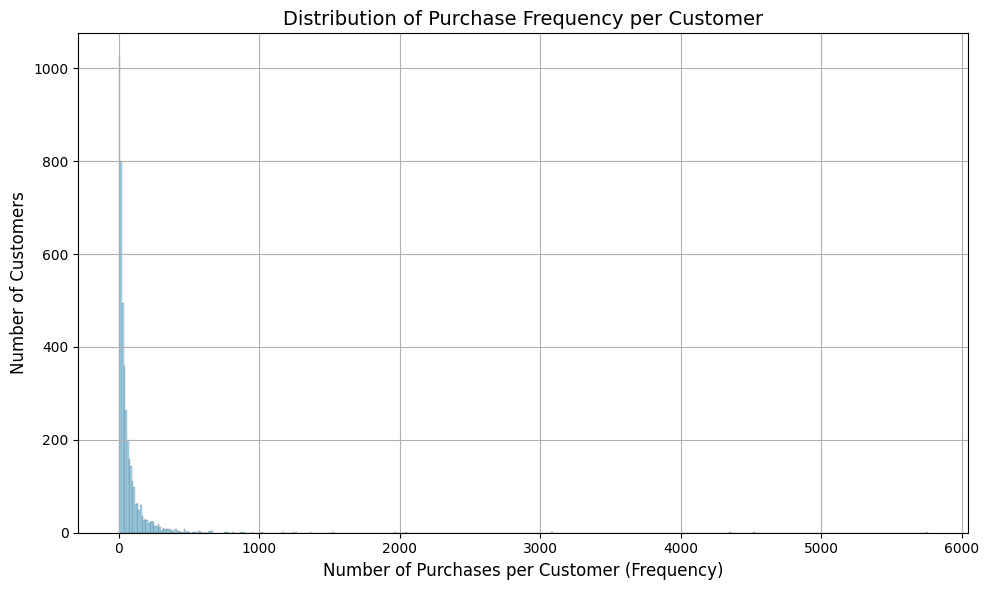

In [129]:
# df_na_treat.groupby(['StockCode','Description']).size().sort_values(ascending=False).head(10)

# temp_frequecy = df_outlier_treat.groupby(['CustomerID']).InvoiceNo.nunique()
# 고객별 구매 빈도 계산
temp_frequency = df_outlier_treat.groupby('CustomerID').size()

# 히스토그램 시각화
plt.figure(figsize=(10, 6))
sns.histplot(temp_frequency, bins=500, kde=False, color='skyblue')

# 라벨 및 제목 설정
plt.xlabel('Number of Purchases per Customer (Frequency)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('Distribution of Purchase Frequency per Customer', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [130]:
#
temp_frequecy.to_frame()
df_frequecy = temp_frequecy.reset_index().rename(columns = {'index' :'CustomerID'})
df_frequecy.columns = ['CustomerID','frequecy']
df_frequecy

,CustomerID,frequecy
0,12346.0,1
1,12347.0,139
2,12348.0,11
3,12349.0,63
4,12350.0,14
...,...,...
4290,18280.0,10
4291,18281.0,4
4292,18282.0,9
4293,18283.0,495


2. 유저별 구매금액 생성


/tmp/ipython-input-131-2052679913.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp_monitery)


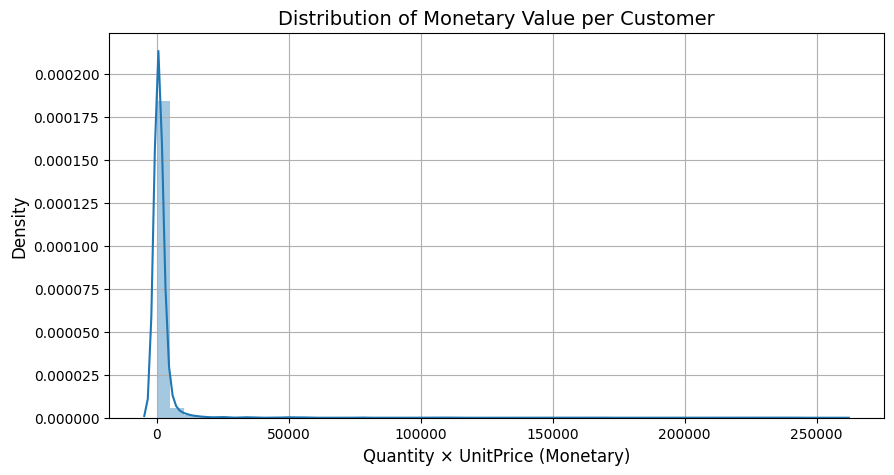

In [131]:
temp = df_outlier_treat[['CustomerID', 'Quantity', 'UnitPrice']].copy()
temp['monitery'] = temp['Quantity'] * temp['UnitPrice']
temp_monitery = temp.groupby(['CustomerID']).monitery.sum()

plt.figure(figsize=(10, 5))
sns.distplot(temp_monitery)

plt.title("Distribution of Monetary Value per Customer", fontsize=14)
plt.xlabel("Quantity × UnitPrice (Monetary)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(True)
plt.show()

In [132]:
df_monitery = temp_monitery.to_frame()
df_monitery = df_monitery.reset_index().rename(columns = {'index' :'CustomerID'})
df_monitery

,CustomerID,monitery
0,12346.0,77183.60
1,12347.0,3764.48
2,12348.0,1114.00
3,12349.0,1368.75
4,12350.0,295.30
...,...,...
4290,18280.0,180.60
4291,18281.0,65.70
4292,18282.0,152.45
4293,18283.0,1714.85


3.유저별 최근 거래 생성
 - 오늘을 2011-12-10일 로 가정  

In [133]:
# pd.DatetimeIndex(df_na_treat['InvoiceDate']).to_period('D') -""
temp2 = df_outlier_treat[['CustomerID','InvoiceDate']].copy()
temp2['today'] ="2011-12-10"

temp2['diff_days'] = (pd.to_datetime(temp2['today']) - pd.to_datetime(temp2['InvoiceDate'])).dt.days
recency = temp2.groupby('CustomerID').diff_days.min()
recency

,diff_days
CustomerID,
12346.0,325
12347.0,2
12348.0,75
12349.0,18
12350.0,310
...,...
18280.0,277
18281.0,180
18282.0,7


In [134]:
df_recency = recency.to_frame()
df_recency = df_recency.reset_index().rename(columns = {'index' :'CustomerID', 'diff_days' :'recency'})
df_recency

,CustomerID,recency
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310
...,...,...
4290,18280.0,277
4291,18281.0,180
4292,18282.0,7
4293,18283.0,3


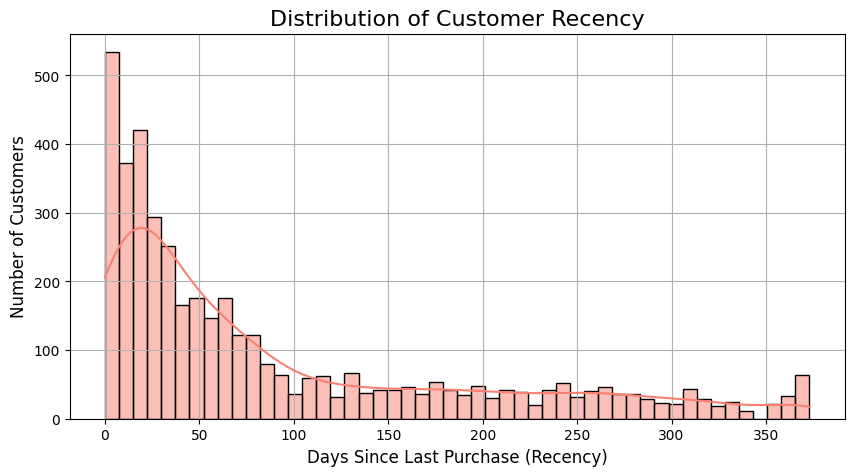

In [135]:
plt.figure(figsize=(10, 5))
sns.histplot(df_recency['recency'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Customer Recency', fontsize=16)
plt.xlabel('Days Since Last Purchase (Recency)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.grid(True)
plt.show()

In [136]:
rfm = pd.merge(df_frequecy, df_recency, how = 'inner', on ='CustomerID')


In [137]:
RFM_data = pd.merge(rfm, df_monitery, how ='inner', on= 'CustomerID')
RFM_data

,CustomerID,frequecy,recency,monitery
0,12346.0,1,325,77183.60
1,12347.0,139,2,3764.48
2,12348.0,11,75,1114.00
3,12349.0,63,18,1368.75
4,12350.0,14,310,295.30
...,...,...,...,...
4290,18280.0,10,277,180.60
4291,18281.0,4,180,65.70
4292,18282.0,9,7,152.45
4293,18283.0,495,3,1714.85


<Axes: xlabel='total_score'>

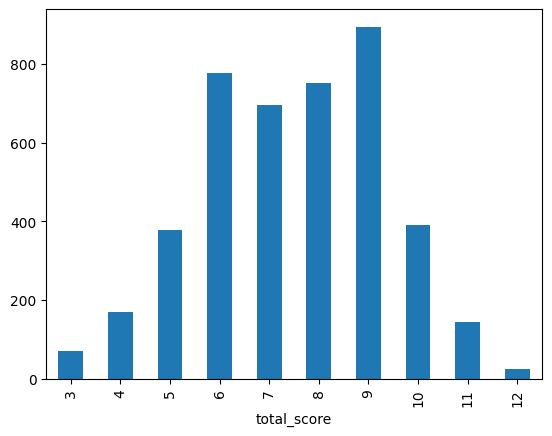

In [138]:
RFM_data['fre_score'] = pd.qcut(RFM_data['frequecy'],4, labels =[1,2,3,4])
RFM_data['rec_score'] = pd.qcut(RFM_data['recency'],4, labels =[1,2,3,4])
RFM_data['mon_score'] = pd.qcut(RFM_data['monitery'],4, labels =[1,2,3,4])
RFM_data['total_score'] = RFM_data['fre_score'].astype(int) + RFM_data['rec_score'].astype(int) + RFM_data['mon_score'].astype(int)
RFM_data['total_score'].value_counts().sort_index().plot(kind='bar')

In [139]:
RFM_data.head()

,CustomerID,frequecy,recency,monitery,fre_score,rec_score,mon_score,total_score
0,12346.0,1,325,77183.60,1,4,4,9
1,12347.0,139,2,3764.48,4,1,4,9
2,12348.0,11,75,1114.00,1,3,3,7
3,12349.0,63,18,1368.75,3,2,3,8
4,12350.0,14,310,295.30,2,4,2,8


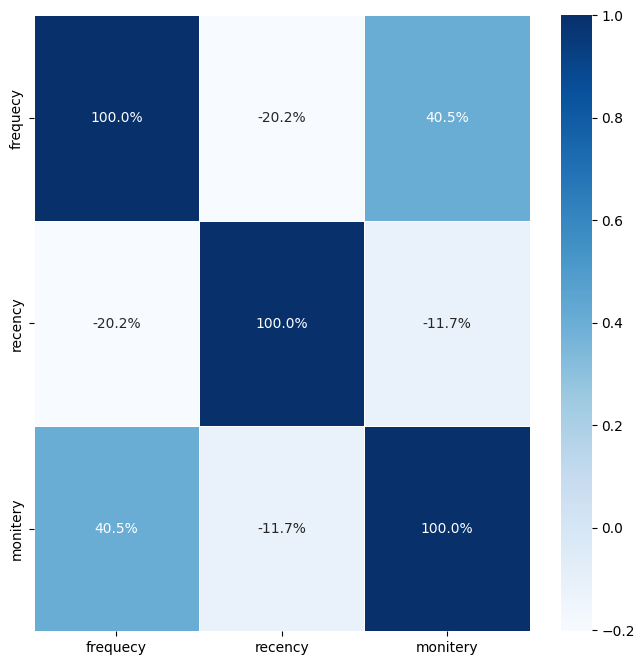

In [140]:
plt.figure(figsize =(8,8))
sns.heatmap(data = RFM_data[['frequecy','recency','monitery']].corr(),annot= True,
            fmt ='.1%', linewidths =.5, cmap='Blues')
plt.show()

In [141]:
df_count_pivot = RFM_data[['rec_score', 'mon_score']].value_counts(sort= False,normalize=True).sort_index().to_frame().unstack()
df_count_pivot

proportion                              
mon_score          1         2         3         4
rec_score                                         
1           0.024680  0.038882  0.065891  0.126193
2           0.048661  0.057276  0.073807  0.067520
3           0.059837  0.069150  0.074971  0.043073
4           0.116880  0.084750  0.035157  0.013271

<Axes: xlabel='None-mon_score', ylabel='rec_score'>

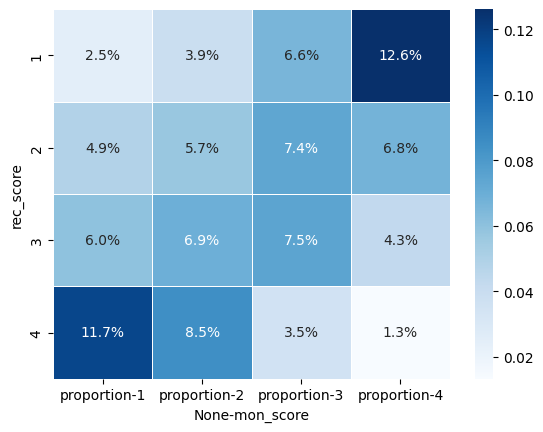

In [142]:
sns.heatmap(df_count_pivot, annot= True, fmt ='.1%', linewidths =.5, cmap='Blues')

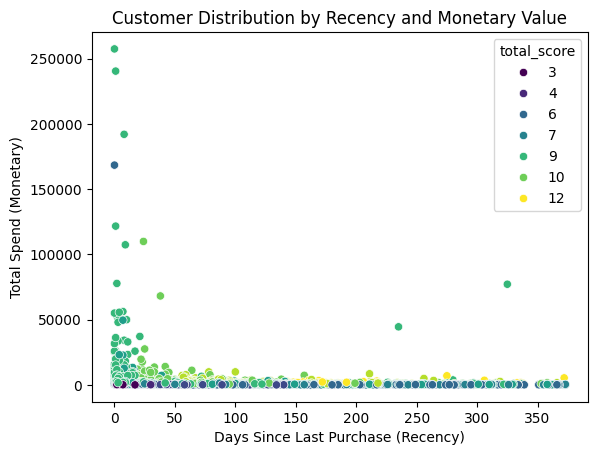

In [149]:
# 예: 2D scatter plot으로 고객 분포 시각화
sns.scatterplot(data=RFM_data, x='recency', y='monitery', hue='total_score', palette='viridis')
plt.title('Customer Distribution by Recency and Monetary Value')
plt.xlabel('Days Since Last Purchase (Recency)')
plt.ylabel('Total Spend (Monetary)')
plt.show()

In [143]:
# 전체 데이터 수 확인
df_org.shape

(541909, 10)

In [144]:
temp2 = df_outlier_treat[['CustomerID','Country']]
temp2.groupby(['CustomerID','Country']).count()
temp2

,CustomerID,Country
0,17850.0,United Kingdom
1,17850.0,United Kingdom
2,17850.0,United Kingdom
3,17850.0,United Kingdom
4,17850.0,United Kingdom
...,...,...
541903,12680.0,France
541905,12680.0,France
541906,12680.0,France
541907,12680.0,France


In [145]:
RFM_data.CustomerID.nunique()

4295

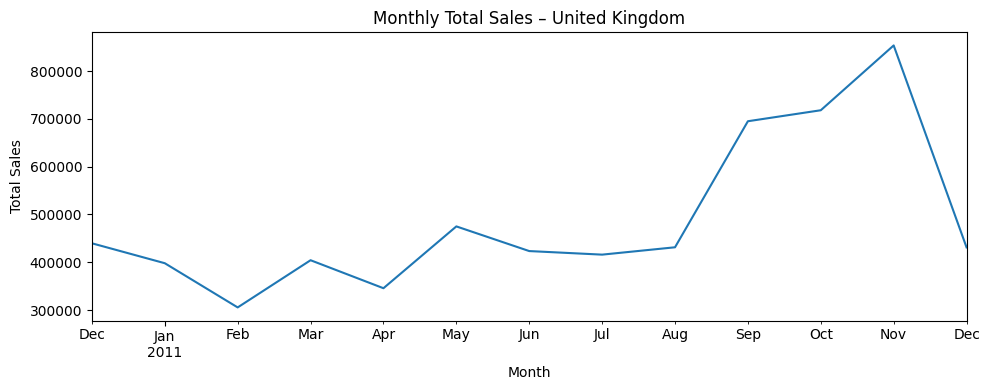

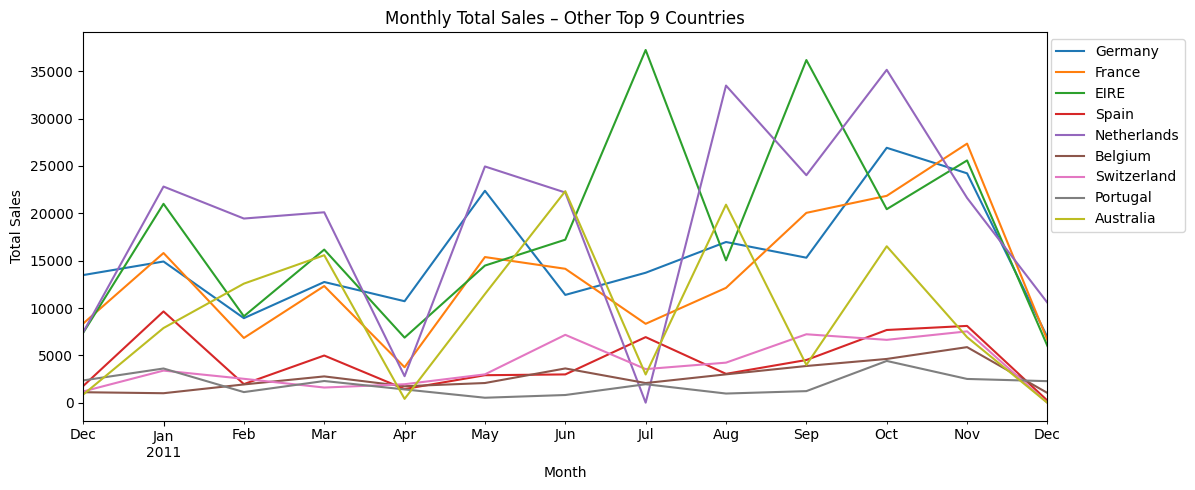

In [146]:
# ✅ 전처리: 반품 제거 및 TotalPrice 컬럼 생성
df_outlier_treat_clean = df_outlier_treat[df_outlier_treat['Quantity'] > 0].copy()
df_outlier_treat_clean['TotalPrice'] = df_outlier_treat_clean['Quantity'] * df_outlier_treat_clean['UnitPrice']

# ✅ 날짜 타입 처리 및 월 단위로 변환
df_outlier_treat_clean['InvoiceDate'] = pd.to_datetime(df_outlier_treat_clean['InvoiceDate'])
df_outlier_treat_clean['YearMonth'] = df_outlier_treat_clean['InvoiceDate'].dt.to_period('M')

# ✅ 월별 국가별 총매출
monthly_sales_by_country = (
    df_outlier_treat_clean.groupby(['YearMonth', 'Country'])['TotalPrice']
                     .sum()
                     .unstack(fill_value=0)
)

# ✅ 거래량 기준 상위 10개 국가 선택
top10_countries = df_outlier_treat_clean['Country'].value_counts().nlargest(10).index
monthly_sales_top10 = monthly_sales_by_country[top10_countries]

# ✅ 영국 (UK) 그래프
plt.figure(figsize=(10, 4))
monthly_sales_top10['United Kingdom'].plot()
plt.title('Monthly Total Sales – United Kingdom')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

# ✅ 나머지 9개 국가 그래프
other_9 = [c for c in top10_countries if c != 'United Kingdom']
monthly_sales_top10[other_9].plot(figsize=(12, 5))
plt.title('Monthly Total Sales – Other Top 9 Countries')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

In [147]:
df_outlier_treat_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,log_UnitPrice,IsCancelled,TotalPrice,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1.266948,False,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.479329,False,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1.321756,False,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.479329,False,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.479329,False,20.34,2010-12


/tmp/ipython-input-148-248581981.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_outlier_treat_clean[df_org['Country'].isin(top_countries)]


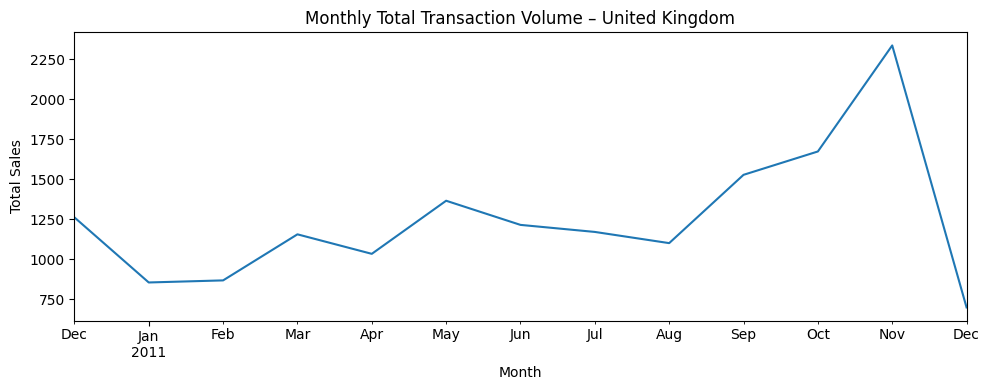

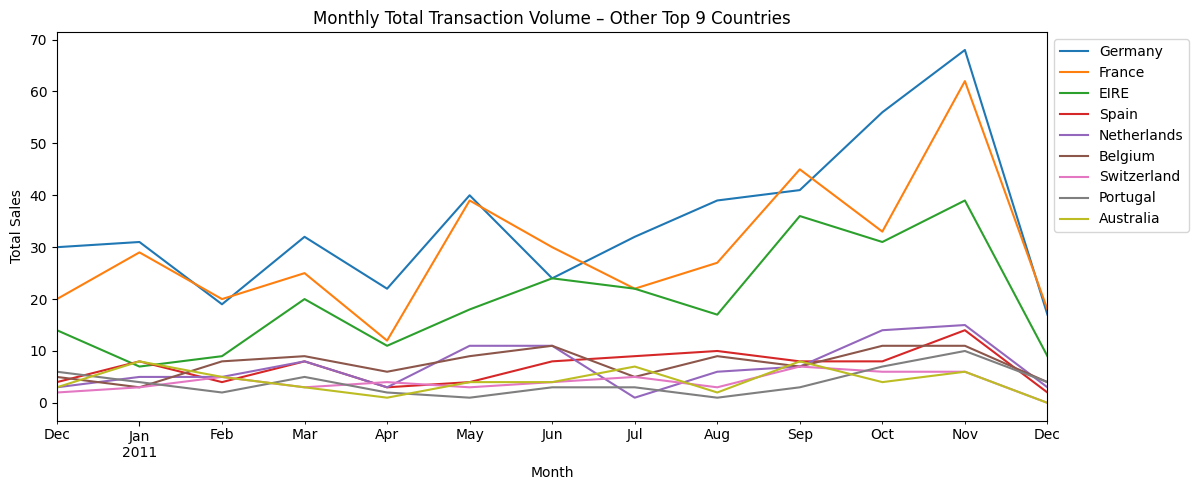

In [148]:
# 거래량 기준 상위 10개 국가 선정
top_countries = df_outlier_treat_clean['Country'].value_counts().head(10).index

# 월별 국가별 거래 수량 피벗 테이블 생성
country_monthly = (
    df_outlier_treat_clean[df_org['Country'].isin(top_countries)]
    .groupby(['YearMonth', 'Country'])['InvoiceNo']
    .nunique()
    .unstack(fill_value=0)
)
monthly_top10 = country_monthly[top_countries]

# ✅ 영국 (UK) 그래프
plt.figure(figsize=(10, 4))
monthly_top10['United Kingdom'].plot()
plt.title('Monthly Total Transaction Volume – United Kingdom')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

# ✅ 나머지 9개 국가 그래프
other_9 = [c for c in top_countries if c != 'United Kingdom']
monthly_top10[other_9].plot(figsize=(12, 5))
plt.title('Monthly Total Transaction Volume – Other Top 9 Countries')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()